In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression 


## Reading and understanding the data

In [2]:

df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data cleaning

In [7]:
# Dropping the unnecessary columns

In [8]:
df = df.drop(['dteday','casual','registered','instant'], axis=1)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
df.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = True)

df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)

In [10]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


## Data visualization

In [11]:

categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday','weathersit']

numerical_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

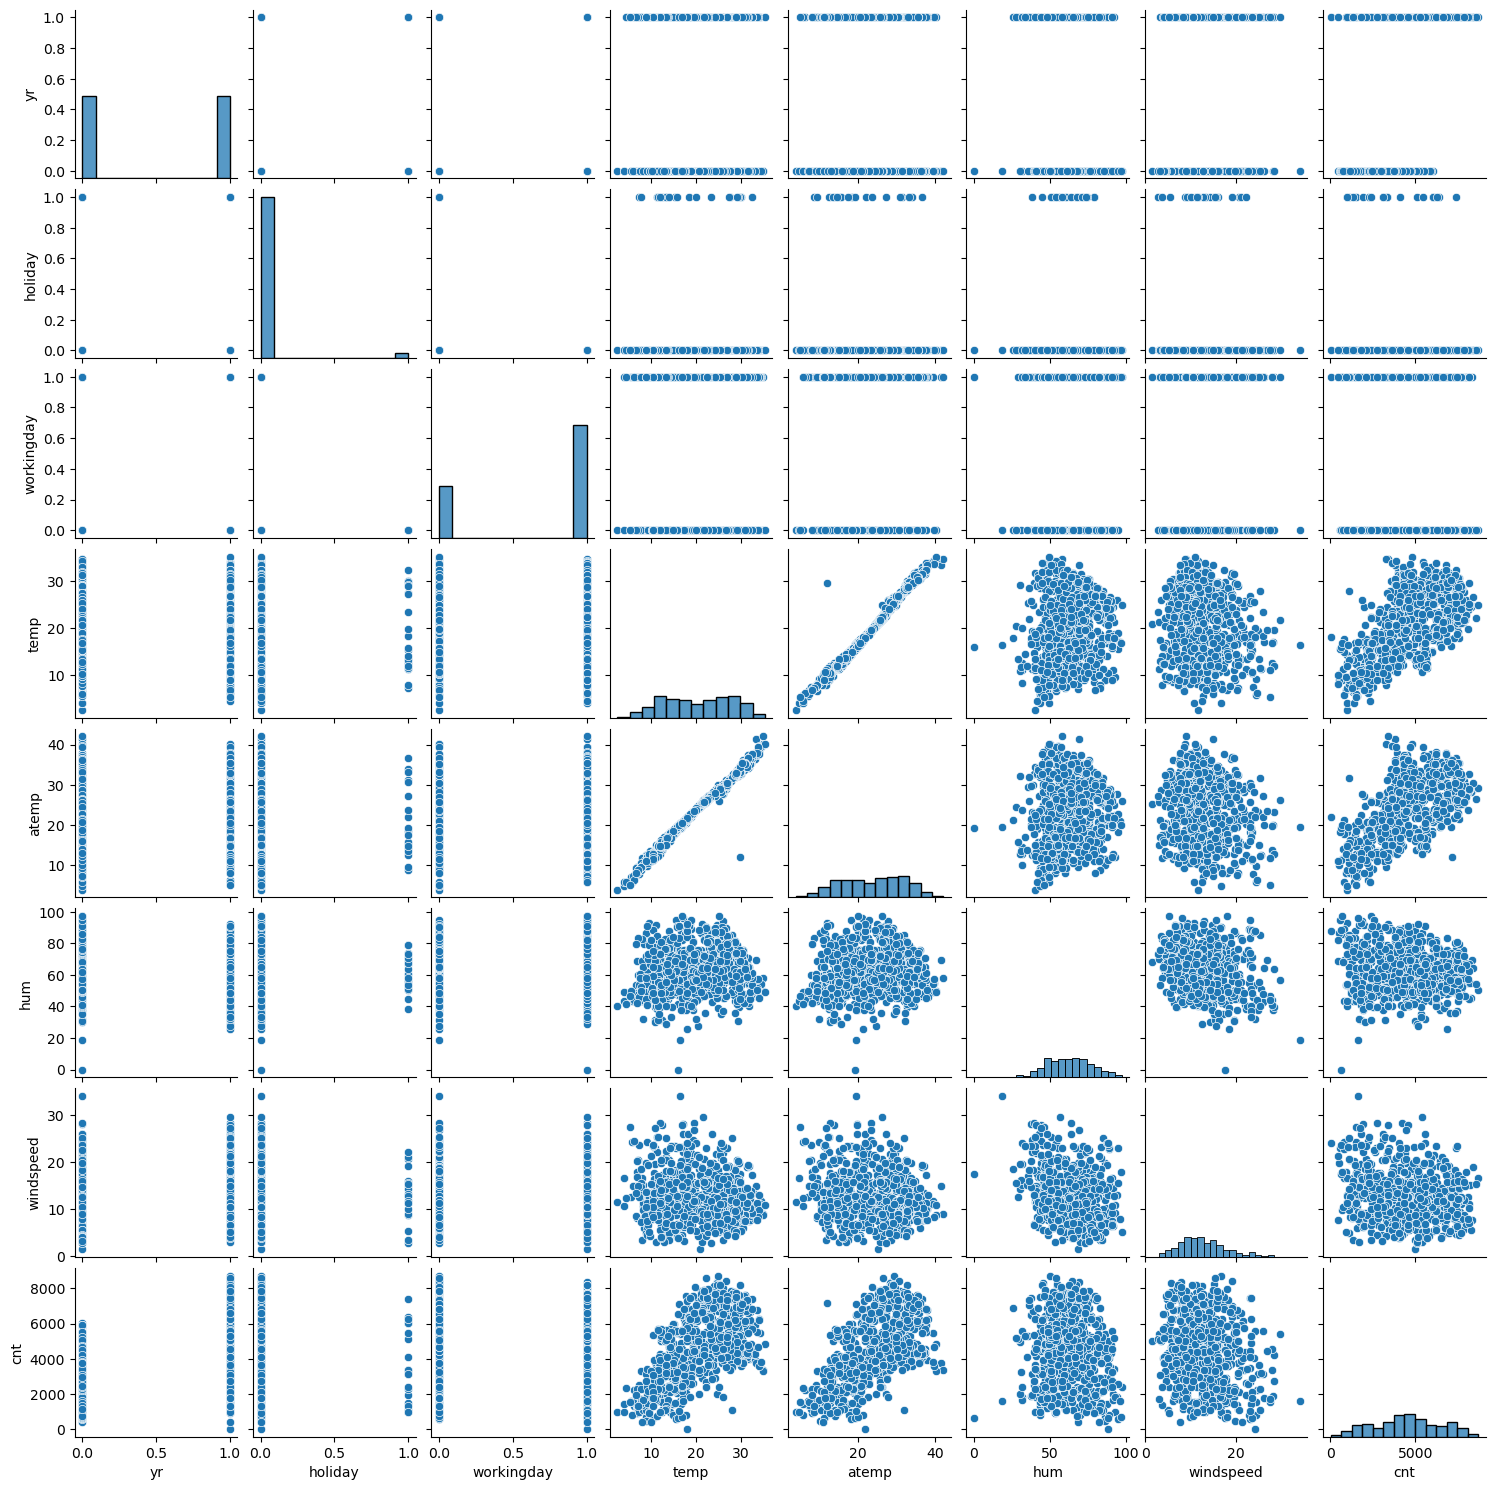

In [12]:
#visualizing numerical variables

g=sns.pairplot(df)
g.fig.set_size_inches(15,15)
plt.show()

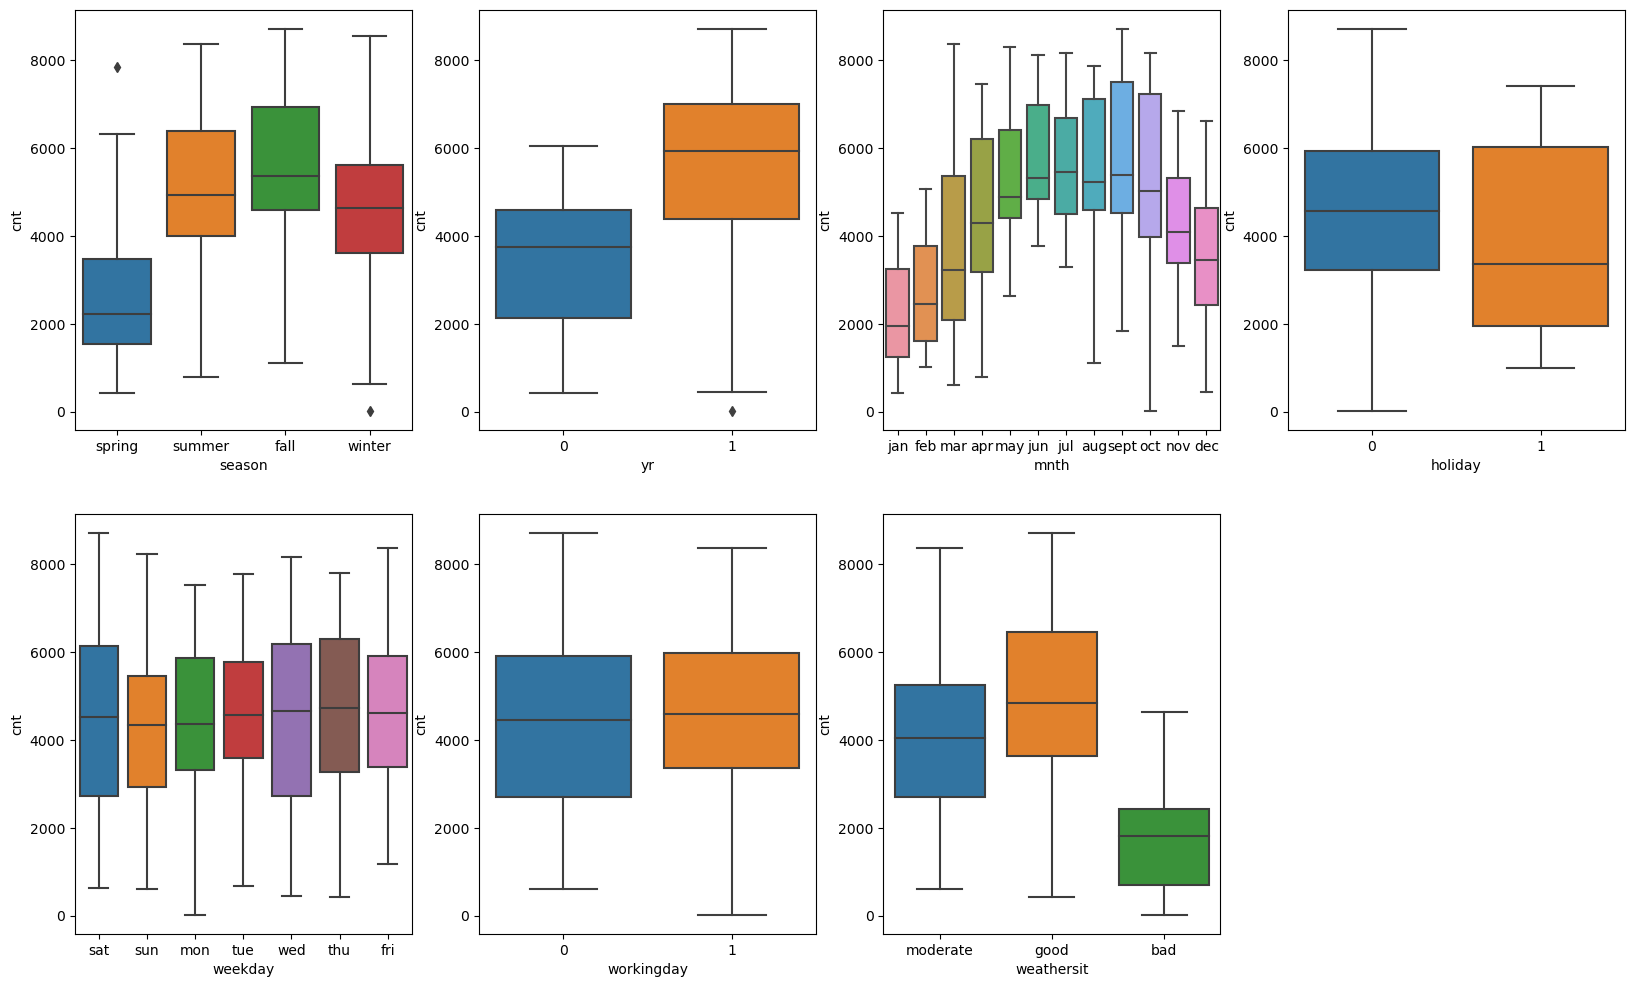

In [13]:
#visualizing categorical variables

#'season', 'yr', 'mnth', 'holiday', 'weekday','workingday','weathersit'

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt',data=df)

plt.subplot(2,4,2)
sns.boxplot(x='yr',y='cnt',data=df)
            
plt.subplot(2,4,3)
sns.boxplot(x='mnth', y='cnt',data=df)
            
plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='cnt',data=df)
            
plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='cnt',data=df)
            
plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt',data=df)

plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y='cnt',data=df)

plt.show()

In [14]:
#creating dummy variables for season, mnth, weekday, weathersit.


#df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)

season_d = pd.get_dummies(df['season'], drop_first=True)
mnth_d = pd.get_dummies(df['mnth'], drop_first=True)
weekday_d = pd.get_dummies(df['weekday'], drop_first=True)
weathersit_d = pd.get_dummies(df['weathersit'], drop_first=True)


In [15]:
df = pd.concat([df, season_d,mnth_d,weekday_d,weathersit_d], axis=1)

df = df.drop(['season','mnth','weekday','weathersit'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  aug         730 non-null    uint8  
 12  dec         730 non-null    uint8  
 13  feb         730 non-null    uint8  
 14  jan         730 non-null    uint8  
 15  jul         730 non-null    uint8  
 16  jun         730 non-null    uint8  
 17  mar         730 non-null    uint8  
 18  may         730 non-null    uint8  
 19  nov         730 non-null    u

In [16]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [17]:
scaler = MinMaxScaler()

df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [18]:
y_train = df_train.pop('cnt')

X_train = df_train

In [19]:
lm = LinearRegression()

lm.fit(X_train, y_train)


rfe = RFE(lm, step = 20)

rfe = rfe.fit(X_train, y_train)

In [20]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 2),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', False, 2),
 ('jun', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', False, 2),
 ('sept', True, 1),
 ('mon', False, 2),
 ('sat', False, 2),
 ('sun', False, 2),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('good', True, 1),
 ('moderate', True, 1)]

In [21]:
col = X_train.columns[rfe.support_]

col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'dec', 'jan', 'sept', 'good', 'moderate'],
      dtype='object')

In [22]:
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [23]:
X_train_rfe = X_train[col]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.12e-187
Time:                        23:33:50   Log-Likelihood:                 507.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     495   BIC:                            -921.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0465      0.048      0.978      0.328      -0.047       0.140
yr             0.2310      0.008     28.228      0.000       0.215       0.247
holiday       -0.0963      0.026     -3.738      0.000      -0.147      -0.046
temp           0.4957      0.136      3.636      0.000       0.228       0.764
atemp         -0.0130      0.139     -0.094      0.925      -0.286       0.260
hum           -0.1552      0.038     -4.062      0.000      -0.230      -0.080
windspeed     -0.1895      0.027     -7.121      0.000      -0.242      -0.137
spring        -0.0409      0.021     -1.951      0.052      -0.082       0.000
summer         0.0638      0.015      4.365      0.000       0.035       0.093
winter         0.1054      0.017      6.033      0.000       0.071       0.140
dec           -0.0222      0.016     -1.364      0.173      -0.054       0.010
jan           -0.0414      0.018     -2.275      0.023      -0.077      -0.006
sept           0.0954      0.016      5.888      0.000       0.064       0.127
good           0.2457      0.027      9.199      0.000       0.193       0.298
moderate       0.1926      0.025      7.618      0.000       0.143       0.242
==============================================================================
Omnibus:                       68.160   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.418
Skew:                          -0.713   Prob(JB):                     1.08e-34
Kurtosis:                       5.308   Cond. No.                         84.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,139.99
3,temp,58.49
4,atemp,53.59
13,good,10.33
14,moderate,8.93
7,spring,4.99
9,winter,3.51
8,summer,2.46
5,hum,1.92
11,jan,1.65


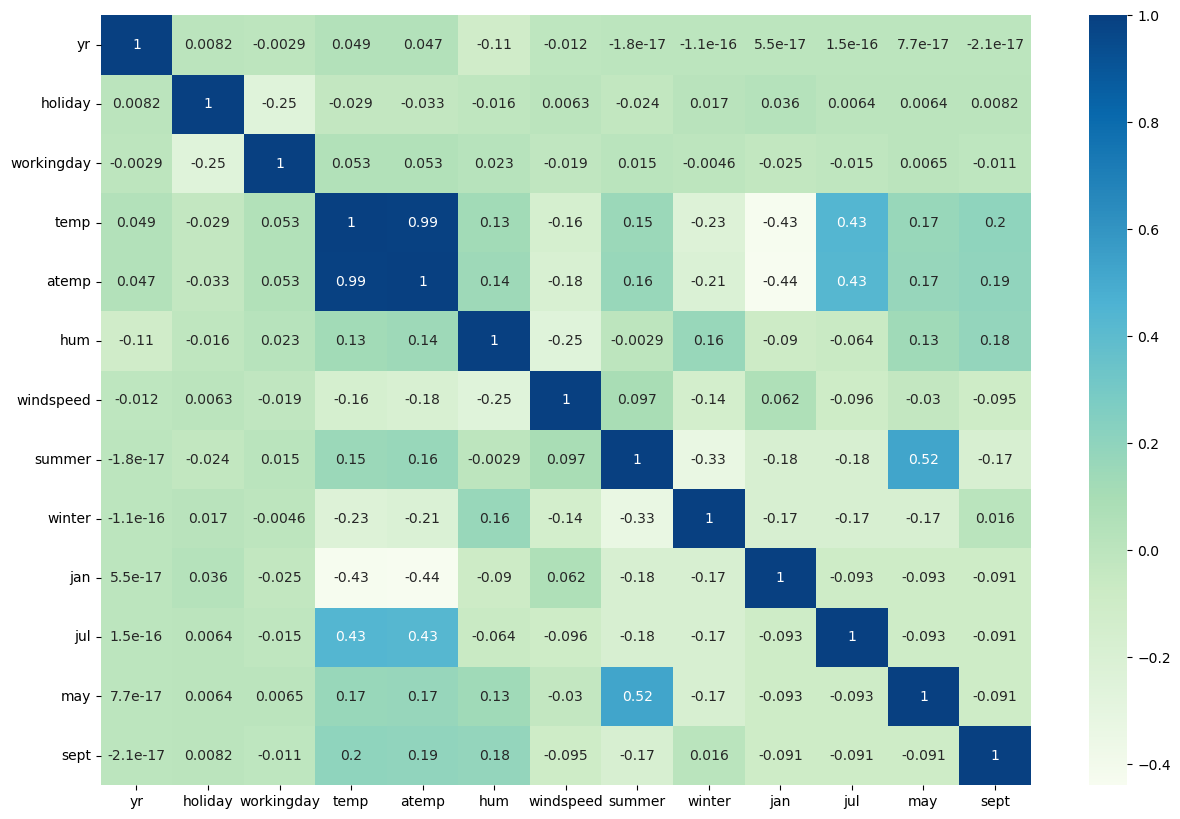

In [25]:
plt.figure(figsize = (15,10))
sns.heatmap(df[['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'summer', 'winter', 'jan', 'jul', 'may', 'sept']].corr(), cmap='GnBu', annot=True)
plt.show()

In [26]:
X = X_train_rfe.drop(['atemp'], axis=1)

X_train_sm = sm.add_constant(X)

#create a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()


lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.86e-188
Time:                        23:33:51   Log-Likelihood:                 507.38
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     496   BIC:                            -927.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0468      0.047      0.986      0.325      -0.046       0.140
yr             0.2310      0.008     28.261      0.000       0.215       0.247
holiday       -0.0962      0.026     -3.741      0.000      -0.147      -0.046
temp           0.4833      0.036     13.513      0.000       0.413       0.554
hum           -0.1554      0.038     -4.074      0.000      -0.230      -0.080
windspeed     -0.1890      0.026     -7.246      0.000      -0.240      -0.138
spring        -0.0411      0.021     -1.982      0.048      -0.082      -0.000
summer         0.0635      0.014      4.433      0.000       0.035       0.092
winter         0.1051      0.017      6.123      0.000       0.071       0.139
dec           -0.0222      0.016     -1.366      0.173      -0.054       0.010
jan           -0.0413      0.018     -2.275      0.023      -0.077      -0.006
sept           0.0953      0.016      5.896      0.000       0.064       0.127
good           0.2455      0.027      9.223      0.000       0.193       0.298
moderate       0.1925      0.025      7.634      0.000       0.143       0.242
==============================================================================
Omnibus:                       68.351   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.941
Skew:                          -0.715   Prob(JB):                     8.33e-35
Kurtosis:                       5.311   Cond. No.                         25.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,139.55
12,good,10.29
13,moderate,8.90
6,spring,4.91
3,temp,4.03
8,winter,3.40
7,summer,2.37
4,hum,1.91
10,jan,1.65
9,dec,1.27


In [28]:
X = X.drop(['dec'], axis=1)

X_train_sm = sm.add_constant(X)

#create a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()


lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.79e-189
Time:                        23:33:51   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0425      0.047      0.896      0.371      -0.051       0.136
yr             0.2309      0.008     28.223      0.000       0.215       0.247
holiday       -0.0950      0.026     -3.695      0.000      -0.146      -0.045
temp           0.4954      0.035     14.287      0.000       0.427       0.564
hum           -0.1607      0.038     -4.230      0.000      -0.235      -0.086
windspeed     -0.1866      0.026     -7.162      0.000      -0.238      -0.135
spring        -0.0395      0.021     -1.906      0.057      -0.080       0.001
summer         0.0663      0.014      4.666      0.000       0.038       0.094
winter         0.1043      0.017      6.077      0.000       0.071       0.138
jan           -0.0358      0.018     -2.020      0.044      -0.071      -0.001
sept           0.0974      0.016      6.045      0.000       0.066       0.129
good           0.2422      0.027      9.129      0.000       0.190       0.294
moderate       0.1900      0.025      7.550      0.000       0.141       0.239
==============================================================================
Omnibus:                       65.838   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.484
Skew:                          -0.697   Prob(JB):                     5.72e-33
Kurtosis:                       5.246   Cond. No.                         25.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,138.93
11,good,10.20
12,moderate,8.85
6,spring,4.89
3,temp,3.79
8,winter,3.39
7,summer,2.32
4,hum,1.89
9,jan,1.56
5,windspeed,1.21


In [30]:

X = X.drop(['spring'], axis=1)

X_train_sm = sm.add_constant(X)

#create a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.85e-189
Time:                        23:33:51   Log-Likelihood:                 504.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     498   BIC:                            -934.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0070      0.044      0.159      0.873      -0.079       0.093
yr             0.2299      0.008     28.085      0.000       0.214       0.246
holiday       -0.0966      0.026     -3.747      0.000      -0.147      -0.046
temp           0.5443      0.023     23.277      0.000       0.498       0.590
hum           -0.1694      0.038     -4.480      0.000      -0.244      -0.095
windspeed     -0.1925      0.026     -7.425      0.000      -0.243      -0.142
summer         0.0844      0.011      7.970      0.000       0.064       0.105
winter         0.1288      0.011     11.248      0.000       0.106       0.151
jan           -0.0394      0.018     -2.229      0.026      -0.074      -0.005
sept           0.1048      0.016      6.682      0.000       0.074       0.136
good           0.2385      0.027      8.988      0.000       0.186       0.291
moderate       0.1880      0.025      7.456      0.000       0.138       0.238
==============================================================================
Omnibus:                       61.185   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.644
Skew:                          -0.680   Prob(JB):                     3.16e-28
Kurtosis:                       5.028   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,117.48
10,good,10.14
11,moderate,8.84
4,hum,1.87
3,temp,1.71
8,jan,1.55
7,winter,1.50
6,summer,1.28
5,windspeed,1.19
9,sept,1.12


In [32]:


X = X.drop(['good'], axis=1)

X_train_sm = sm.add_constant(X)

#create a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()


lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     216.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.92e-174
Time:                        23:33:51   Log-Likelihood:                 466.23
No. Observations:                 510   AIC:                            -910.5
Df Residuals:                     499   BIC:                            -863.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3131      0.029     10.623      0.000       0.255       0.371
yr             0.2308      0.009     26.179      0.000       0.213       0.248
holiday       -0.0860      0.028     -3.099      0.002      -0.140      -0.031
temp           0.5681      0.025     22.700      0.000       0.519       0.617
hum           -0.3011      0.038     -8.021      0.000      -0.375      -0.227
windspeed     -0.2367      0.027     -8.635      0.000      -0.291      -0.183
summer         0.0877      0.011      7.693      0.000       0.065       0.110
winter         0.1281      0.012     10.390      0.000       0.104       0.152
jan           -0.0310      0.019     -1.630      0.104      -0.068       0.006
sept           0.1022      0.017      6.051      0.000       0.069       0.135
moderate      -0.0201      0.011     -1.870      0.062      -0.041       0.001
==============================================================================
Omnibus:                      100.458   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.194
Skew:                          -0.991   Prob(JB):                     2.84e-55
Kurtosis:                       5.809   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,46.09
3,temp,1.69
4,hum,1.59
8,jan,1.54
7,winter,1.50
10,moderate,1.39
6,summer,1.28
5,windspeed,1.15
9,sept,1.12
1,yr,1.03


In [34]:


X = X.drop(['jan'], axis=1)

X_train_sm = sm.add_constant(X)

#create a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()


lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     239.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.51e-175
Time:                        23:33:52   Log-Likelihood:                 464.88
No. Observations:                 510   AIC:                            -909.8
Df Residuals:                     500   BIC:                            -867.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2972      0.028     10.669      0.000       0.242       0.352
yr             0.2300      0.009     26.086      0.000       0.213       0.247
holiday       -0.0868      0.028     -3.123      0.002      -0.141      -0.032
temp           0.5887      0.022     27.212      0.000       0.546       0.631
hum           -0.3046      0.038     -8.117      0.000      -0.378      -0.231
windspeed     -0.2319      0.027     -8.495      0.000      -0.286      -0.178
summer         0.0926      0.011      8.410      0.000       0.071       0.114
winter         0.1363      0.011     12.075      0.000       0.114       0.158
sept           0.1039      0.017      6.152      0.000       0.071       0.137
moderate      -0.0203      0.011     -1.884      0.060      -0.041       0.001
==============================================================================
Omnibus:                       98.680   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.653
Skew:                          -0.979   Prob(JB):                     1.23e-53
Kurtosis:                       5.762   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,41.03
4,hum,1.58
9,moderate,1.39
3,temp,1.26
7,winter,1.25
6,summer,1.19
5,windspeed,1.13
8,sept,1.11
1,yr,1.03
2,holiday,1.01


In [36]:


X = X.drop(['moderate'], axis=1)

X_train_sm = sm.add_constant(X)

#create a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()


lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     267.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.56e-175
Time:                        23:33:52   Log-Likelihood:                 463.07
No. Observations:                 510   AIC:                            -908.1
Df Residuals:                     501   BIC:                            -870.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3106      0.027     11.504      0.000       0.258       0.364
yr             0.2290      0.009     25.953      0.000       0.212       0.246
holiday       -0.0849      0.028     -3.052      0.002      -0.140      -0.030
temp           0.5972      0.021     28.161      0.000       0.556       0.639
hum           -0.3409      0.032    -10.550      0.000      -0.404      -0.277
windspeed     -0.2358      0.027     -8.640      0.000      -0.289      -0.182
summer         0.0918      0.011      8.321      0.000       0.070       0.113
winter         0.1384      0.011     12.298      0.000       0.116       0.161
sept           0.1033      0.017      6.106      0.000       0.070       0.137
==============================================================================
Omnibus:                       92.969   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.906
Skew:                          -0.955   Prob(JB):                     9.66e-47
Kurtosis:                       5.515   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
X_train_sm = X_train_sm.drop(['const'], axis=1)

In [38]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,hum,9.79
2,temp,7.02
4,windspeed,3.53
0,yr,2.00
6,winter,1.63
5,summer,1.58
7,sept,1.20
1,holiday,1.03


In [39]:
#_train_cnt = lm.predict(X_train_sm)
y_train_cnt=lr_model.predict(X_train_sm)


ValueError: shapes (510,8) and (9,) not aligned: 8 (dim 1) != 9 (dim 0)

In [ ]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 10)
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                # X-label

In [ ]:
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[numerical_vars] = scaler.transform(df_test[numerical_vars])
df_test.head()



In [ ]:
y_test = df_test.pop('cnt')

X_test = df_test

In [ ]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
#X_test_new = sm.add_constant(X_test_new)

In [ ]:
X_test.shape

In [ ]:
X.shape

In [ ]:
X_train_sm.shape